# **10.5.15**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Задаем параметры задачи
a, b, c = 0, 1.5, 0.875
n = 100  # количество узлов сетки
h = (b - a) / (n - 1)  # шаг сетки
x = np.linspace(a, b, n)

def k(x):
    if a <= x < c:
        return 0.5
    elif c <= x <= b:
        return 1.8

def q(x):
    if a <= x < c:
        return 5.6
    elif c <= x <= b:
        return 8.5

def f(x):
    return 9*x*(3.5 - x)

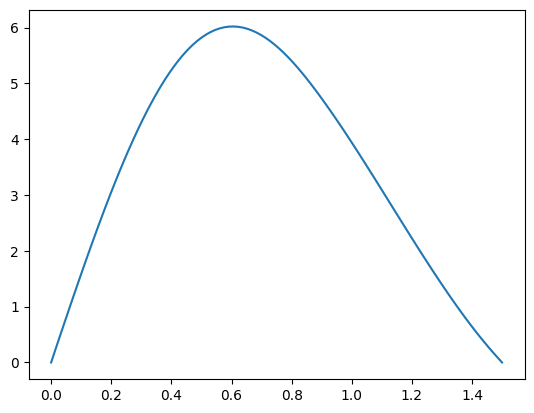

In [5]:
# Матрицы для прогонки
A = np.zeros(n-2)
B = np.zeros(n-2)
C = np.zeros(n-2)
D = np.zeros(n-2)

# Построение матрицы для внутренней части
for i in range(1, n-1):
    A[i-1] = k(x[i]) / h**2
    B[i-1] = -2 * k(x[i]) / h**2 + q(x[i])
    C[i-1] = k(x[i]) / h**2
    D[i-1] = f(x[i])

# Учет краевых условий методом баланса
# Левое краевое условие: -k(a)u'(a) + 0.5*u(a) = 0
B[0] += 1 / h * k(x[0]) + 0.5
D[0] -= 0.5 * f(x[0])

# Правое краевое условие: k(b)u'(b) + 0.5*u(b) = 0
B[-1] += 1 / h * k(x[-1]) + 0.5
D[-1] -= 0.5 * f(x[-1])

# Прямой проход метода прогонки
alpha = np.zeros(n-2)
beta = np.zeros(n-2)
alpha[0] = -C[0] / B[0]
beta[0] = D[0] / B[0]

for i in range(1, n-2):
    alpha[i] = -C[i] / (B[i] + A[i] * alpha[i-1])
    beta[i] = (D[i] - A[i] * beta[i-1]) / (B[i] + A[i] * alpha[i-1])

# Обратный проход
u = np.zeros(n)
u[-2] = beta[-1]

for i in range(n-3, -1, -1):
    u[i+1] = alpha[i] * u[i+2] + beta[i]

plt.plot(x, u)